In [1]:
import numpy as np
import matplotlib.pyplot as plt
from SimPEG import Utils

In [2]:
X, Y = np.meshgrid(np.arange(-10,11,0.1), np.arange(-10,11,0.1))
Z = np.ones_like(X) * 10

x, y, z = X.reshape(-1), Y.reshape(-1), Z.reshape(-1)

In [3]:
# Inducing field
H = Utils.matutils.spherical2cartesian(np.c_[50000, -np.deg2rad(90), np.deg2rad(0)])

# Define sphere at origin
R = 1 # meters
xc, yc, zc = 0, 0, 0
chi = 0.1


mx = np.ones_like(x) * H[0] * R**3 / 3 * chi
my = np.ones_like(y) * H[1] * R**3 / 3 * chi
mz = np.ones_like(z) * H[2] * R**3 / 3 * chi

M = np.c_[mx, my, mz]

dx = (x - xc)
dy = (y - yc)
dz = (z - zc)

rvec = np.c_[dx, dy, dz]
r = np.sqrt((dx)**2+(dy)**2+(dz)**2)

bx = (
    -mx/r**3 + 
    3 * np.sum(M*rvec, axis=1)/r**5*dx
)

by = (
    -my/r**3 + 
    3 * np.sum(M*rvec, axis=1)/r**5*dy
)

bz = (
    -mz/r**3 + 
    3 * np.sum(M*rvec, axis=1)/r**5*dz
)

Text(0.5, 1.0, 'Bz')

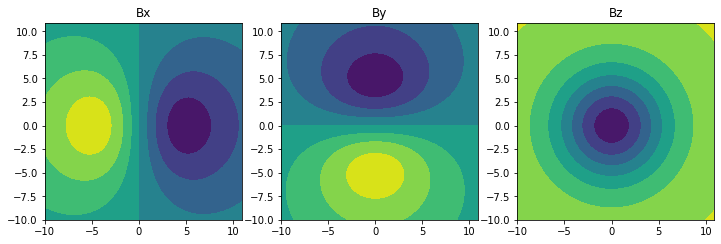

In [4]:
plt.figure(figsize=(12,8))
axs = plt.subplot(1,3,1)
plt.contourf(X, Y, bx.reshape(X.shape))
axs.set_aspect('equal')
axs.set_title("Bx")
axs = plt.subplot(1,3,2)
plt.contourf(X, Y, by.reshape(X.shape))
axs.set_aspect('equal')
axs.set_title("By")
axs = plt.subplot(1,3,3)
plt.contourf(X, Y, bz.reshape(X.shape))
axs.set_aspect('equal')
axs.set_title("Bz")



In [5]:
bxx = (
    3*mx*dx/r**5 + 
    3*mx*dx/r**5 + 
    3 * np.sum(M*rvec, axis=1)/r**5 +
    -15 * np.sum(M*rvec, axis=1)/r**7*dx**2.
)

byy = (
    3*my*dy/r**5 + 
    3*my/r**5*dy + 
    3 * np.sum(M*rvec, axis=1)/r**5 +
    -15 * np.sum(M*rvec, axis=1)/r**7*dy**2.
)

bzz = (
    3*mz*dz/r**5 + 
    3*mz/r**5*dz + 
    3 * np.sum(M*rvec, axis=1)/r**5 +
    -15 * np.sum(M*rvec, axis=1)/r**7*dz**2.
)

bxy = (
    3*mx*dy/r**5 + 
    3*my*dx/r**5 + 
    -15 * np.sum(M*rvec, axis=1)/r**7*dx*dy
)

bxz = (
    3*mx*dz/r**5 + 
    3*mz*dx/r**5 + 
    -15 * np.sum(M*rvec, axis=1)/r**7*dx*dz
)

byz = (
    3*my*dz/r**5 + 
    3*mz*dy/r**5 + 
    -15 * np.sum(M*rvec, axis=1)/r**7*dz*dy
)


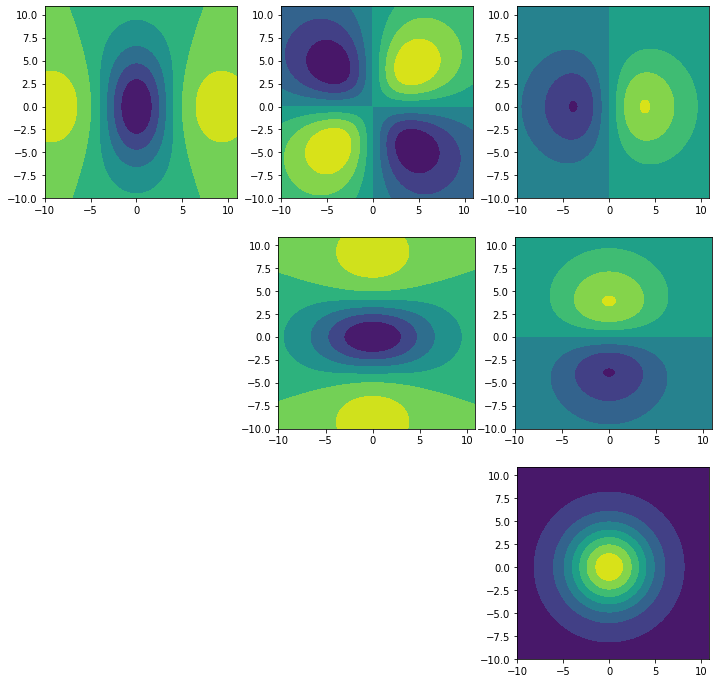

In [6]:
plt.figure(figsize=(12,12))

axs = plt.subplot(3,3,1)
plt.contourf(X, Y, bxx.reshape(X.shape))
axs.set_aspect('equal')

axs = plt.subplot(3,3,2)
plt.contourf(X, Y, bxy.reshape(X.shape))
axs.set_aspect('equal')

axs = plt.subplot(3,3,3)
plt.contourf(X, Y, bxz.reshape(X.shape))
axs.set_aspect('equal')

axs = plt.subplot(3,3,5)
plt.contourf(X, Y, byy.reshape(X.shape))

axs = plt.subplot(3,3,6)
plt.contourf(X, Y, byz.reshape(X.shape))

axs = plt.subplot(3,3,9)
plt.contourf(X, Y, bzz.reshape(X.shape))

axs.set_aspect('equal')



In [7]:
(bxx+byy) - bzz


array([0.08553337, 0.0862425 , 0.086944  , ..., 0.07395364, 0.07324088,
       0.07252709])